# PyTorch
## Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters. <br>
Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see Bridge with NumPy). Tensors are also optimized for automatic differentiation (we’ll see more about that later in the Autograd section). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!
### Initializing a Tensor
Starting with loading the libraries

In [30]:
import torch
import numpy as np

Tensors can be initialized in various ways:
- Initializing a Tensor directly from the data

In [31]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


- Initializing a Tensor from a NumPy array

In [32]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array) #Keep in mind Tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data
print(x_np)

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


- Initializing a Tensor from another tensor

In [33]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data (Keeping the shape and datatype)
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data (still keeping the shape tho)
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6291, 0.9233],
        [0.6722, 0.8786]]) 



- Initializing a Tensor with random or constant values:

In [34]:
shape = (2,3) #This describes the dimensionality of the output tensor and it consist of (the number of rows, the number of colomns).

#Creating Tensors based on the predefined shape
rand_tensor = torch.rand(shape) 
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.6297, 0.4552, 0.4424],
        [0.5285, 0.5486, 0.3522]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Attributes of a Tensor:
Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [35]:
tensor = torch.rand(3,4)

print(f"Random Tensor: \n {tensor}")
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

tensor = tensor.to("cuda") # moving the tensor to GPU
print(f"Device tensor is stored on: {tensor.device}") 

Random Tensor: 
 tensor([[0.6909, 0.1729, 0.9505, 0.3809],
        [0.1872, 0.5459, 0.8301, 0.3712],
        [0.2743, 0.9736, 0.7486, 0.6037]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
Device tensor is stored on: cuda:0


### Operations on Tensors
There are over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, indexing, slicing), sampling... etc. <br>
Keep in mind, that tensors are created on CPU by default, and even though you can move them to a cuda device (GPU) as shown in the example above, moving large tensors can be really expensive.

- Standard numpy-like indexing and slicing:

In [36]:
tensor = torch.ones(4, 4)

print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")

tensor[:,1] = 0 #Replacing every 2nd element from every vector (array) into a 0

print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


- **Joining tensors** You can use `torch.cat` to concatenate a sequence of tensors along a given dimension.

In [37]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


- Arithmetic operations

In [38]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3) #This saves the output in y3 so it won't be random anymore


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3) #This saves the output in z3 so it won't be random anymore

# Since all of them pretty much doing the same thing i'll just print one tensor of each
print(f"Matrix multiplication:\n {y1} \n")
print(f"Element-wise multiplication:\n {z1}")

Matrix multiplication:
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

Element-wise multiplication:
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


- **Single-element tensors** If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using `item()`:

In [39]:
agg = tensor.sum()
agg_item = agg.item()

print(agg, type(agg))
print(agg_item, type(agg_item))

tensor(12.) <class 'torch.Tensor'>
12.0 <class 'float'>


- **In-place operations Operations** store the result into the operand are called in-place. They are denoted by a `_` suffix. For example: `x.copy_(y)`, `x.t_()`, will change x.

In [40]:
print(f"{tensor} \n")
tensor.add_(5) #This would overwrite the tensor itself storing the result.
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## Datasets & Dataloaders
Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use preloaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and Dataloader wraps an iterable around the Dataset to enable easy access to the samples.

PyTorch domain libraries provide a number of preloaded datasets (such as Fashion-MNIST) that subclass `torch.utils.data.Dataset` and implement functions specific to the particular data. They can be used to prototype and benchmark your model. You can find them here: Image Datasets, Text Datasets, and Audio Datasets

### Loading a Dataset
Here is an example of how to load the Fashion-MNIST dataset from TorchVision. Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

In [41]:
#importing the libs
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

#Loading the data
training_data = datasets.FashionMNIST(
    root="data", #Path to the data
    train=True, #Are the data for training
    download=True, #Download the data if they don't exist
    transform=ToTensor() #Transform the feature and label into tensors
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

print(f"A sample of our data consists of {len(test_data[0])} parts, the first part being the image itself as a tensor \
is of the following shape '{test_data[0][0].shape}', while the oher part is an integer refering to the label.")

A sample of our data consists of 2 parts, the first part being the image itself as a tensor is of the following shape 'torch.Size([1, 28, 28])', while the oher part is an integer refering to the label.


Now an example about how to build a custom Dataset class that creates the dataset from a data path, using the folders as a label

In [42]:
import os
from turtle import color, colormode
import pandas as pd
from torchvision.io import read_image, ImageReadMode
from torchvision import transforms as t

class CustomImageDataset(Dataset):
    """A custom Dataset class"""
    def __init__(self,data_path, transform = None, target_transform=None):
        """The __init__ function is run once when instantiating the Dataset object."""
        self.path = data_path
        self.transform = transform
        self.target_transform = target_transform

        list_of_elem = []

        for root, dirs, files in os.walk(self.path):
            for file in files:
                list_of_elem.append([root + "/" + file, root.split("/")[-1]])

        self.img_labels = pd.DataFrame(list_of_elem, columns=["Img_Path", "Label"])

    def __len__(self):
        """returns the number of samples in our dataset."""
        return len(self.img_labels)

    def __getitem__(self, idx):
        """The __getitem__ function loads and returns a sample from the dataset at the given index idx. Based on the index, it identifies the image’s location on disk, converts that to a tensor using read_image, retrieves the corresponding label from the data in self.img_labels, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple."""
        image = read_image(self.img_labels.iloc[idx, 0],mode = ImageReadMode.GRAY) #To load a gray scale image
        #print(self.img_labels.iloc[idx, 0])
        label = int(self.img_labels.iloc[idx, 1])
        #print(self.img_labels.iloc[idx, 1])
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


custom_dataset = CustomImageDataset(data_path="data/Fashion(selfbuilt)/",transform = t.Resize((28,28)))
x = custom_dataset.__getitem__(6)[0]
y = custom_dataset.__getitem__(6)[1]

print(f"x is the tensor of the 7th image with the shape {x.shape} and has {y} as its label")

x is the tensor of the 7th image with the shape torch.Size([1, 28, 28]) and has 1 as its label


### Iterating and Visualizing the Dataset


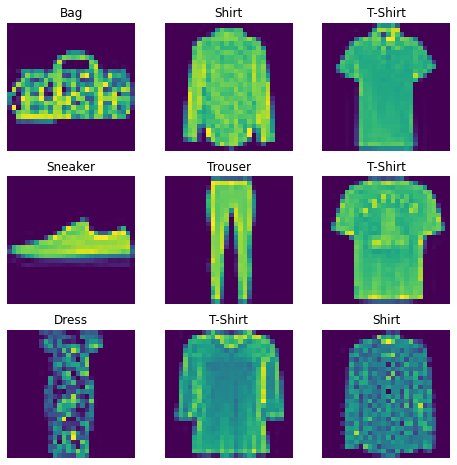

In [43]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    #print(img.shape)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()

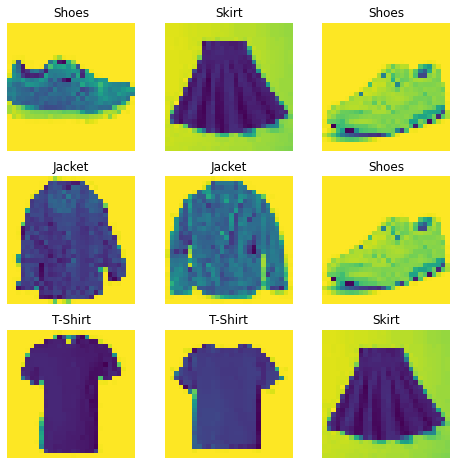

In [44]:
labels_map = {
    0: "T-Shirt",
    1: "Skirt",
    2: "Shoes",
    3: "Jacket"
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(custom_dataset), size=(1,)).item()
    img, label = custom_dataset[sample_idx]
    #print(img.shape)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()

### Preparing the data for training with DataLoaders
The `Dataset` retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an easy API.


In [45]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)
custom_dataset_dataloader = DataLoader(custom_dataset, batch_size=4, shuffle = True) #Since the amount of data is really small (just 16 elem) creating 4 batches is enough
print(len(custom_dataset_dataloader))

4


### Iterate through the DataLoader
We have loaded that dataset into the `DataLoader` and can iterate through the dataset as needed. Each iteration below returns a batch of `train_features` and `train_labels` (containing `batch_size=64` features and labels respectively). Because we specified `shuffle=True`, after we iterate over all batches the data is shuffled

Feature batch shape: torch.Size([4, 1, 28, 28])
Labels batch shape: torch.Size([4])


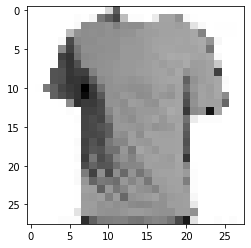

Label: 0


In [46]:
train_features, train_labels = next(iter(custom_dataset_dataloader)) #Checking to see if our custom dataset was working just like the others
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Building the neural network
Neural networks comprise of layers/modules that perform operations on data. The `torch.nn` namespace provides all the building blocks you need to build your own neural network. Every module in PyTorch subclasses the `nn.Module`. A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.
Starting with importing libs

In [47]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Get Device for Training
We want to be able to train our model on a hardware accelerator like the GPU, if it is available. Let’s check to see if torch.cuda is available, else we continue to use the CPU.

In [59]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


### Define the Class
We define our neural network by subclassing `nn.Module`, and initialize the neural network layers in `__init__`. Every `nn.Module` subclass implements the operations on input data in the forward method.

In [57]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten() #Flattens a contiguous range of dims into a tensor. torch.Size([32, 1, 5, 5]) -> torch.Size([32, 1*5*5 = 25])
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), #Applies a linear transformation to the incoming data (input shape, output shape)
            nn.ReLU(), #Aktivation function
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model, we pass it the input data. This executes the model’s forward, along with some background operations. Do not call `model.forward()` directly!

Calling the model on the input returns a 2-dimensional tensor with `dim=0` corresponding to each output of 10 raw predicted values for each class, and `dim=1` corresponding to the individual values of each output. We get the prediction probabilities by passing it through an instance of the `nn.Softmax` module.

In [73]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X.to(device))
pred_probab = nn.Softmax(dim=1)(logits) #Applies the Softmax function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range [0,1] and sum to 1.
print(f"The tensor including all the posibilites of the diffrent classes:\n {pred_probab}")
y_pred = pred_probab.argmax(1) #Returns the indices of the maximum value of all elements in the input tensor, meaning the pred with the highest certinty
print(f"The prediction tensor: {y_pred}")

The tensor including all the posibilites of the diffrent classes:
 tensor([[0.0979, 0.1075, 0.0953, 0.0911, 0.1149, 0.1006, 0.1040, 0.1016, 0.0915,
         0.0956]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
The prediction tensor: tensor([4], device='cuda:0')


## Automatic differentiation with `Torch.autograd`
When training neural networks, the most frequently used algorithm is **back propagation**. In this algorithm, parameters (model weights) are adjusted according to the **gradient** of the loss function with respect to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine called `torch.autograd`. It supports automatic computation of gradient for any computational graph.

Consider the simplest one-layer neural network, with input `x`, parameters `w` and `b`, and some loss function. It can be defined in PyTorch in the following manner:

In [81]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output

#Parameters that needs optimization (requires_grad should be true in order to 
# do back propagation)
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

z = torch.matmul(x, w)+b # The ground truth function
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")


Gradient function for z = <AddBackward0 object at 0x0000020E947F9190>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x0000020E99F725E0>


### Computing Gradients
To optimize weights of parameters in the neural network, we need to compute the derivatives of our loss function with respect to parameters, namely, we need $\frac{\partial loss}{\partial w}$ and $\frac{\partial loss}{\partial b}$
​
under some fixed values of `x` and `y`. To compute those derivatives, we call `loss.backward()`, and then retrieve the values from `w.grad` and `b.grad`:

In [82]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.3293, 0.0333, 0.1122],
        [0.3293, 0.0333, 0.1122],
        [0.3293, 0.0333, 0.1122],
        [0.3293, 0.0333, 0.1122],
        [0.3293, 0.0333, 0.1122]])
tensor([0.3293, 0.0333, 0.1122])
tensor([[-0.2513,  0.0239,  0.5660],
        [ 0.3490, -1.9204, -1.5739],
        [ 1.6351, -0.5917,  1.9680],
        [ 0.5942,  1.2285, -1.0084],
        [ 0.9692, -0.2970, -1.1396]], requires_grad=True)


## Optimizing model parameters
Now that we have a model and data it’s time to train, validate and test our model by optimizing its parameters on our data. Training a model is an iterative process; in each iteration (called an epoch) the model makes a guess about the output, calculates the error in its guess (loss), collects the derivatives of the error with respect to its parameters and optimizes these parameters using gradient descent. For a more detailed walkthrough of this process.

### Hyperparameters
Hyperparameters are adjustable parameters that let you control the model optimization process. Different hyperparameter values can impact model training and convergence rates.

We define the following hyperparameters for training:
- **Number of Epochs** the number times to iterate over the dataset.
- **Batch Size** the number of data samples propagated through the network before the parameters are updated
- **Learning Rate** how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

In [84]:
#Defining the 3 Hyperparameters that i'll be using
learning_rate = 1e-3 # wich is the standard usually
batch_size = 64
epochs = 10

### Optimization Loop
Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each iteration of the optimization loop is called an **epoch**.

Each epoch consists of two main parts:
- **The Train Loop** iterate over the training dataset and try to converge to optimal parameters.
- **The Validation/Test Loop** iterate over the test dataset to check if model performance is improving.



### Loss Function
When presented with some training data, our untrained network is likely not to give the correct answer. **Loss function** measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. To calculate the loss we make a prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include `nn.MSELoss` (Mean Square Error) for regression tasks, and `nn.NLLLoss` (Negative Log Likelihood) for classification. `nn.CrossEntropyLoss` combines `nn.LogSoftmax` and `nn.NLLLoss`.

Keeping in mind that both `nn.NLLLoss` and `nn.CrossEntropyLoss` are the same, becase we have to use the `nn.LogSoftmax` anyway for getting the `nn.NLLLoss` as can be seen in the example below:

In [85]:
import torch
from torch import nn

prediction = torch.randn(3,5,requires_grad=True)
target = torch.tensor([0,1,4]) 

print(prediction)
print(target)

log_softmax = nn.LogSoftmax(dim=-1)
loss_fn_nll = nn.NLLLoss()
loss_fn_ce = nn.CrossEntropyLoss()

loss_nll = loss_fn_nll(log_softmax(prediction), target)
loss_ce = loss_fn_ce(prediction, target)

print(loss_nll)
print(loss_ce)


tensor([[ 1.1739, -1.8178, -0.0244,  0.3402, -0.4991],
        [-1.2626, -1.2205,  0.1085, -1.3435,  0.9199],
        [ 0.5882,  0.2448, -0.1948, -0.1524, -1.3244]], requires_grad=True)
tensor([0, 1, 4])
tensor(2.1118, grad_fn=<NllLossBackward0>)
tensor(2.1118, grad_fn=<NllLossBackward0>)


And just as we can see above, both losses are exactly the same and both are using NllLoss backward method in the backend.

Now as to initialize the loss function that i'll use in the training example:

In [86]:
loss_fn = nn.CrossEntropyLoss()

### Optimizer
Optimization is the process of adjusting model parameters to reduce model error in each training step. Optimization algorithms define how this process is performed (in this example we use Stochastic Gradient Descent). All optimization logic is encapsulated in the optimizer object. Here, we use the SGD optimizer; additionally, there are many optimizers available in PyTorch such as ADAM and RMSProp, that work better for different kinds of models and data.

We initialize the optimizer by registering the model’s parameters that need to be trained, and passing in the learning rate hyperparameter.

In [91]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X=X.to(device)
        y=y.to(device)
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()#reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
        loss.backward()#Backpropagate the prediction loss
        optimizer.step()#adjust the parameters by the gradients collected in the backward pass.

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X=X.to(device)
            y=y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.293569  [    0/60000]
loss: 2.287116  [ 6400/60000]
loss: 2.273238  [12800/60000]
loss: 2.261172  [19200/60000]
loss: 2.235879  [25600/60000]
loss: 2.219566  [32000/60000]
loss: 2.226703  [38400/60000]
loss: 2.206177  [44800/60000]
loss: 2.168854  [51200/60000]
loss: 2.197222  [57600/60000]
Test Error: 
 Accuracy: 34.9%, Avg loss: 2.159879 

Epoch 2
-------------------------------
loss: 2.149520  [    0/60000]
loss: 2.135096  [ 6400/60000]
loss: 2.106964  [12800/60000]
loss: 2.079992  [19200/60000]
loss: 2.076392  [25600/60000]
loss: 2.037186  [32000/60000]
loss: 1.975004  [38400/60000]
loss: 1.965278  [44800/60000]
loss: 1.957651  [51200/60000]
loss: 1.927128  [57600/60000]
Test Error: 
 Accuracy: 53.3%, Avg loss: 1.915063 

Epoch 3
-------------------------------
loss: 1.934005  [    0/60000]
loss: 1.890215  [ 6400/60000]
loss: 1.815201  [12800/60000]
loss: 1.863395  [19200/60000]
loss: 1.726805  [25600/60000]
loss: 1.742433  [32000/600

## Saving and loading a PyTorch Model
### Saving and Loading Model Weights
PyTorch models store the learned parameters in an internal state dictionary, called `state_dict`. These can be persisted via the `torch.save` method:

In [112]:
import torch

torch.save(model.state_dict(), "Models/Pytorch_Basics/model(FashionMNIST)_weights.pth")


To load model weights, you need to create an instance of the same model first, and then load the parameters using `load_state_dict()` method.

In [113]:
model = NeuralNetwork().to(device) # we do not specify pretrained=True, i.e. do not load default weights
model.load_state_dict(torch.load('Models/Pytorch_Basics/model(FashionMNIST)_weights.pth'))
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

### Saving and Loading Models with Shapes
When loading model weights, we needed to instantiate the model class first, because the class defines the structure of a network. We might want to save the structure of this class together with the model, in which case we can pass model (and not `model.state_dict())` to the saving function:

In [114]:
import torch

torch.save(model, 'Models/Pytorch_Basics/model(FashionMNIST).pth')

We can then load the model like this:

In [116]:
model = torch.load('Models/Pytorch_Basics/model(FashionMNIST).pth')
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

## Done :)